In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import skimage.io as io

In [3]:
# Load the movie meta-data dataset
df = pd.read_csv('movie_metadata.csv')

In [6]:
# Display first 5 rows
# df.head(5) # outputs top 5 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [9]:
# Get the values as numpy array and check shape
vals = df.values
print(vals.shape,vals.dtype)

(5043, 28) object


In [10]:
#print all columns
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [16]:
# print a few movie title
titles = df.get(['movie_title'])#,'gross'])
# print(titles)
titles.head()

,movie_title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,Star Wars: Episode VII - The Force Awakens ...


In [19]:
lens=[]

for ix in titles.values:
    lens.append(len(str(ix[0])))

print(len(lens))

5043


In [20]:
freq={}

for ix in lens:
    curr = freq.get(ix,0) # if freq[ix] is not set ,get function returns the default value,in this case 0 otherwise the value associated with it
    freq[ix] = curr+1

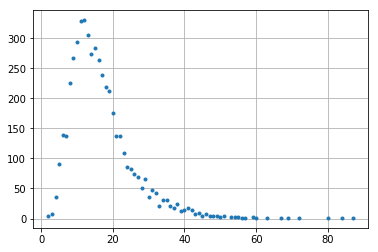

In [25]:
plt.figure(0)
plt.grid(True)
plt.plot(freq.keys(),freq.values(),'.')
plt.show()

### Second Example

In [27]:
data = pd.DataFrame({'group':['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],'ounces':[4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [28]:
data.sort_values(by=['ounces'],ascending=True,inplace=False)

,group,ounces
1,a,3.0
6,c,3.0
0,a,4.0
7,c,5.0
3,b,6.0
8,c,6.0
4,b,7.5
5,b,8.0
2,a,12.0


In [29]:
data.sort_values(by=['group','ounces'],ascending=[True,False],inplace=False)

,group,ounces
2,a,12.0
0,a,4.0
1,a,3.0
5,b,8.0
4,b,7.5
3,b,6.0
8,c,6.0
7,c,5.0
6,c,3.0


### Third Example

In [30]:
# To remove the duplicate rows
data = pd.DataFrame({'k1':['one']*3 + ['two']*4, 'k2':[3,2,1,3,3,4,4]})
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [35]:
data.sort_values(by='k2')

,k1,k2
2,one,1
1,one,2
0,one,3
3,two,3
4,two,3
5,two,4
6,two,4


In [36]:
data.drop_duplicates()

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
5,two,4


In [37]:
data.drop_duplicates(subset='k1')

,k1,k2
0,one,3
3,two,3


### Fourth Example

In [39]:
# learn to categorize rows based on a predefined criteria
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [40]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}
def meat_2_animal(series):
    if series['food'] == 'bacon':
        return 'pig'
    elif series['food'] == 'pulled pork':
        return 'pig'
    elif series['food'] == 'pastrami':
        return 'cow'
    elif series['food'] == 'corned beef':
        return 'cow'
    elif series['food'] == 'honey ham':
        return 'pig'
    else:
        return 'salmon'

#create a new variable
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [41]:
data.assign(new_variable = data['ounces']*10)

,food,ounces,animal,new_variable
0,bacon,4.0,pig,40.0
1,pulled pork,3.0,pig,30.0
2,bacon,12.0,pig,120.0
3,Pastrami,6.0,cow,60.0
4,corned beef,7.5,cow,75.0
5,Bacon,8.0,pig,80.0
6,pastrami,3.0,cow,30.0
7,honey ham,5.0,pig,50.0
8,nova lox,6.0,salmon,60.0
